<a href="https://colab.research.google.com/github/dominikjagoda/my-first/blob/main/DeepLearning_zad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split

####################################################
# Load dataset with faces
from sklearn.datasets import fetch_lfw_people

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.50)  
print(lfw_people.images.shape)


# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
# to get real names, not digits
target_names = lfw_people.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Image shape: ",X_train.shape)
# dimension of face image
nfaces, h, w = lfw_people.images.shape
print("Image shape: ", h, w)

(1140, 62, 47)
Image shape:  (855, 2914)
Image shape:  62 47


In [2]:
# train the model

clf = MLPClassifier(hidden_layer_sizes=(100,50),solver='adam',verbose=10,early_stopping=True)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
score2 = clf.score(X_train,y_train)
print(score)
print(score2)


Iteration 1, loss = inf
Validation score: 0.453488
Iteration 2, loss = 204.56113852
Validation score: 0.360465
Iteration 3, loss = 70.74813638
Validation score: 0.197674
Iteration 4, loss = 58.72985974
Validation score: 0.244186
Iteration 5, loss = 38.76499378
Validation score: 0.093023
Iteration 6, loss = 59.69744001
Validation score: 0.209302
Iteration 7, loss = 32.45590603
Validation score: 0.523256
Iteration 8, loss = 38.31819996
Validation score: 0.523256
Iteration 9, loss = 25.13051769
Validation score: 0.255814
Iteration 10, loss = 16.08116937
Validation score: 0.488372
Iteration 11, loss = 10.76310714
Validation score: 0.546512
Iteration 12, loss = 8.74271723
Validation score: 0.441860
Iteration 13, loss = 7.45860845
Validation score: 0.523256
Iteration 14, loss = 9.34829665
Validation score: 0.534884
Iteration 15, loss = 18.58773362
Validation score: 0.569767
Iteration 16, loss = 37.29290373
Validation score: 0.569767
Iteration 17, loss = 34.82828237
Validation score: 0.465116

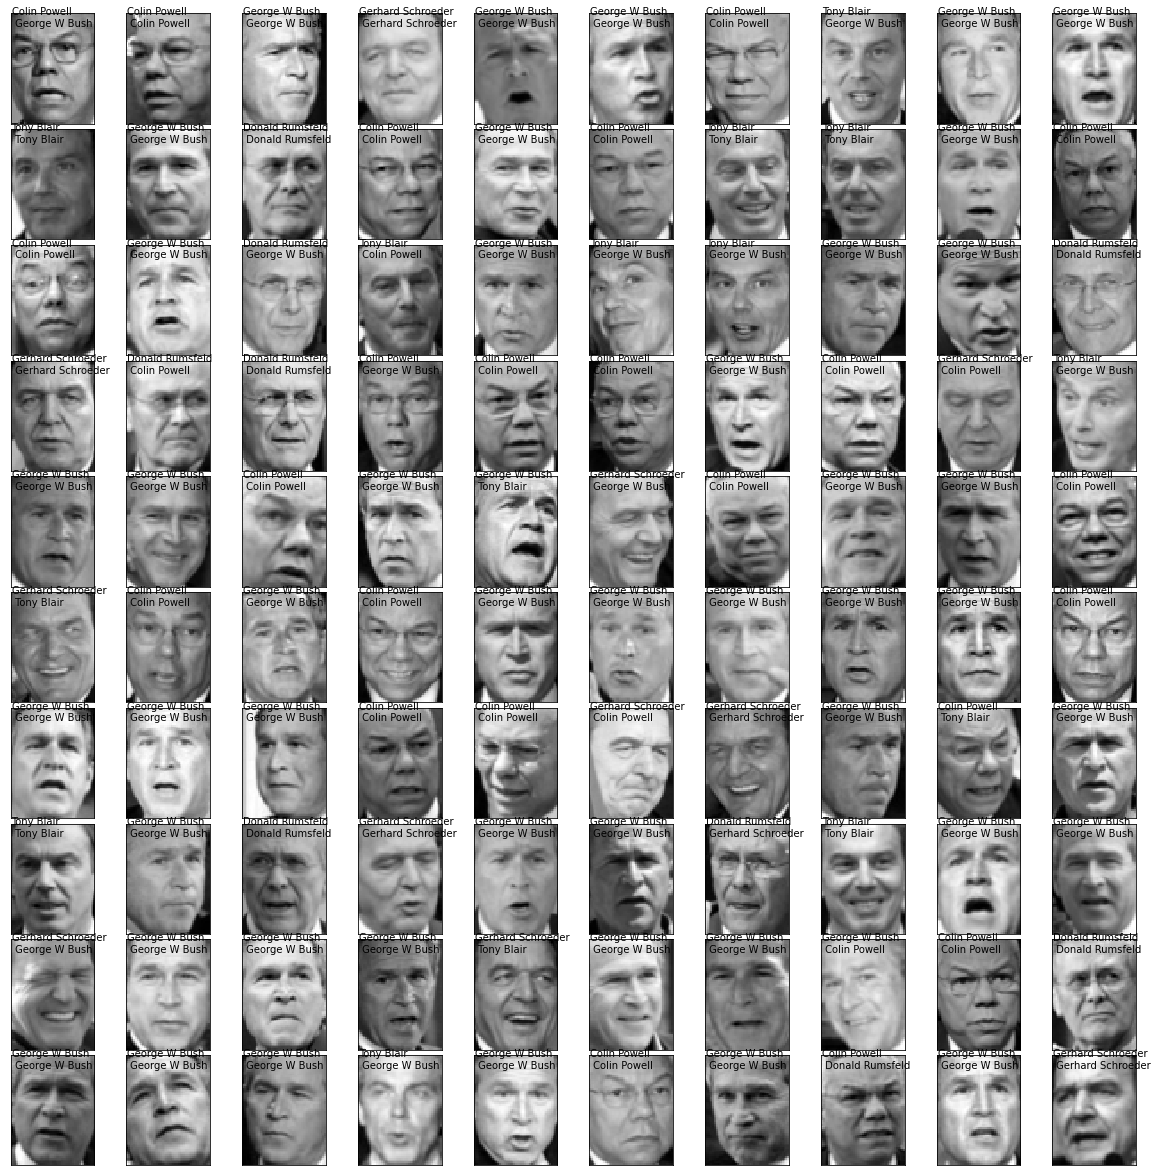

In [8]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
  # label the image with the target valu
  #ax.text(0, 7, str(target_names[y_test[i]]))
  predicted = clf.predict(X_test)
  expected = y_test
  ax.text(0, 7, str(target_names[expected[i]])+"\n "+str(target_names[predicted[i]]), color='black')
